\begin{center}
\begin{tabular}{c c c}
\includegraphics[width=100pt]{images/trust.png} &
\begin{minipage}{0.6\textwidth}
\begin{center}
\textbf{C.K.Pithawala College of Engineering and Technology, Surat} \\[2mm]
Subject: Python for Data Science [3150713] \\[2mm]
Computer Engineering Department \\[2mm]
Submitted To: Prof. Mithila D. Parekh
\end{center}
\end{minipage} &
\includegraphics[width=90pt]{images/institute.png}
\end{tabular}
\end{center}

# OEP + Heart Risk Detection System

### Dataset Information

Name: Heart Disease UCI  
Link: https://www.kaggle.com/code/mragpavank/heart-disease-uci/input  
Description: The UCI Heart Disease Dataset is a benchmark dataset from the UCI Machine Learning Repository, originally donated by researchers from the Cleveland Clinic Foundation. It is designed to predict the presence or absence of heart disease in a patient based on various medical attributes. 

### Goal of our System

The goal of this project is to develop a machine learning model capable of predicting the risk of heart disease in individuals based on clinical and lifestyle-related features derived from the UCI Heart Disease dataset.

The model aims to:  
- Analyze key medical attributes such as age, blood pressure, cholesterol levels, heart rate, and chest pain type.

- Classify patients into “at risk” or “not at risk” categories for heart disease.

- Support early diagnosis and preventive healthcare decisions by identifying patterns that indicate a higher probability of heart disease.

Ultimately, the project seeks to build a reliable, data-driven decision support system that can assist medical professionals in detecting potential heart disease risks early, thereby improving patient outcomes and reducing mortality rates.

## OEP

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/admin/Downloads/heart.csv')
df.head()

,Age,Sex,Chest Pain(T),Resting bs,chol,fasting bs,restecg,Max heart rate,Exercise induced angina,oldpeak,slope of peak exercise,number of major vessels,thal,Diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.columns

Index(['Age', 'Sex', 'Chest Pain(T)', 'Resting bs', 'chol', 'fasting bs',
       'restecg', 'Max heart rate', 'Exercise induced angina', 'oldpeak',
       'slope of peak exercise', 'number of major vessels', 'thal',
       'Diagnosis'],
      dtype='object')

In [10]:
df.isnull().sum()

Age                        0
Sex                        0
Chest Pain(T)              0
Resting bs                 0
chol                       0
fasting bs                 0
restecg                    0
Max heart rate             0
Exercise induced angina    0
oldpeak                    0
slope of peak exercise     0
number of major vessels    0
thal                       0
Diagnosis                  0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(1)

In [12]:
'''
Here we have one duplicate value , we are going to drop the duplicate value
to improve our data quality and ensure accurate analysis.
'''

'\nHere we have one duplicate value , we are going to drop the duplicate value\nto improve our data quality and ensure accurate analysis.\n'

In [13]:
df.drop_duplicates()

,Age,Sex,Chest Pain(T),Resting bs,chol,fasting bs,restecg,Max heart rate,Exercise induced angina,oldpeak,slope of peak exercise,number of major vessels,thal,Diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
# We have removed the duplicate value

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest Pain(T)            303 non-null    int64  
 3   Resting bs               303 non-null    object 
 4   chol                     303 non-null    object 
 5   fasting bs               303 non-null    int64  
 6   restecg                  303 non-null    int64  
 7   Max heart rate           303 non-null    int64  
 8   Exercise induced angina  303 non-null    int64  
 9   oldpeak                  303 non-null    float64
 10  slope of peak exercise   303 non-null    int64  
 11  number of major vessels  303 non-null    int64  
 12  thal                     303 non-null    int64  
 13  Diagnosis                303 non-null    int64  
dtypes: float64(1), int64(11), 

### Categorization

In [16]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 40, 60, 100],
                         labels=['Young', 'Middle-aged', 'Elderly'])
# For Age Group

In [17]:
df['Age Group']

0          Elderly
1            Young
2      Middle-aged
3      Middle-aged
4      Middle-aged
          ...     
298    Middle-aged
299    Middle-aged
300        Elderly
301    Middle-aged
302    Middle-aged
Name: Age Group, Length: 303, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Elderly']

In [18]:
# Converting chol to numeric
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

### Slicing & Dicing

In [51]:
# Slicing only males
male_patients = df[df['Sex'] == 1]
# Dicing males above 50 years with high cholesterol
male_high_chol = df[(df['Sex'] == 1) & (df['Age'] > 50) & (df['chol'] > 240)]
print("\nSliced Subset Shape:", male_high_chol.head())


Sliced Subset Shape:     Age  Sex  Chest Pain(T) Resting bs   chol  fasting bs  restecg  \
23   61    1              2        150  243.0           1        1   
33   54    1              2        125  273.0           0        0   
45   52    1              1        120  325.0           0        1   
51   66    1              0        120  302.0           0        0   
61   54    1              1        108  309.0           0        1   

    Max heart rate  Exercise induced angina  oldpeak  slope of peak exercise  \
23             137                        1      1.0                       1   
33             152                        0      0.5                       0   
45             172                        0      0.2                       2   
51             151                        0      0.4                       1   
61             156                        0      0.0                       2   

    number of major vessels  thal  Diagnosis    Age Group  
23              

### Filtering

In [52]:
high_risk = df[df['Diagnosis'] == 1]
low_risk = df[df['Diagnosis'] == 0]
print(f"\nHigh Risk Patients: {len(high_risk)}, Low Risk Patients: {len(low_risk)}")


High Risk Patients: 165, Low Risk Patients: 138


### Concatenation

In [53]:
combined = pd.concat([high_risk, low_risk])
print("\nConcatenated shape:", combined.head())


Concatenated shape:    Age  Sex  Chest Pain(T) Resting bs   chol  fasting bs  restecg  \
0   63    1              3        145  233.0           1        0   
1   37    1              2        130  250.0           0        1   
2   41    0              1        130  204.0           0        0   
3   56    1              1        120  236.0           0        1   
4   57    0              0        120  354.0           0        1   

   Max heart rate  Exercise induced angina  oldpeak  slope of peak exercise  \
0             150                        0      2.3                       0   
1             187                        0      3.5                       0   
2             172                        0      1.4                       2   
3             178                        0      0.8                       2   
4             163                        1      0.6                       2   

   number of major vessels  thal  Diagnosis    Age Group  
0                        0    

### Transformation

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Resting bs', 'chol', 'Max heart rate', 'oldpeak']] = scaler.fit_transform(
    df[['Age', 'Resting bs', 'chol', 'Max heart rate', 'oldpeak']])
scaler

,copy,True
,with_mean,True
,with_std,True


### Sorting

In [54]:
sorted_df = df.sort_values(by='Age')
print("\nData sorted by Age",sorted_df.head())


Data sorted by Age      Age  Sex  Chest Pain(T) Resting bs   chol  fasting bs  restecg  \
72    29    1              1        130  204.0           0        0   
58    34    1              3        118  182.0           0        0   
125   34    0              1        118  210.0           0        1   
239   35    1              0        126  282.0           0        0   
65    35    0              0        138  183.0           0        1   

     Max heart rate  Exercise induced angina  oldpeak  slope of peak exercise  \
72              202                        0      0.0                       2   
58              174                        0      0.0                       2   
125             192                        0      0.7                       2   
239             156                        1      0.0                       2   
65              182                        0      1.4                       2   

     number of major vessels  thal  Diagnosis Age Group  
72      

### Aggregation

In [56]:
df['chol'] = pd.to_numeric(df['chol'],errors='coerce')
df['Resting bs'] = pd.to_numeric(df['Resting bs'],errors='coerce')
# Converting chol and resting bs to numeric

In [57]:
agg_data = df.groupby('Age Group')[['chol', 'Resting bs', 'Max heart rate']].mean()
print("\nAverage values by Age Group:\n", agg_data)


Average values by Age Group:
                    chol  Resting bs  Max heart rate
Age Group                                          
Young        212.894737  126.842105      169.526316
Middle-aged  244.004878  129.965686      151.839024
Elderly      259.615385  136.949367      139.177215


/var/folders/qf/9t7krrts2nbf4_6v5l4bwcxr0000gn/T/ipykernel_761/2093336895.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = df.groupby('Age Group')[['chol', 'Resting bs', 'Max heart rate']].mean()


### Exploratory Data Analysis(EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

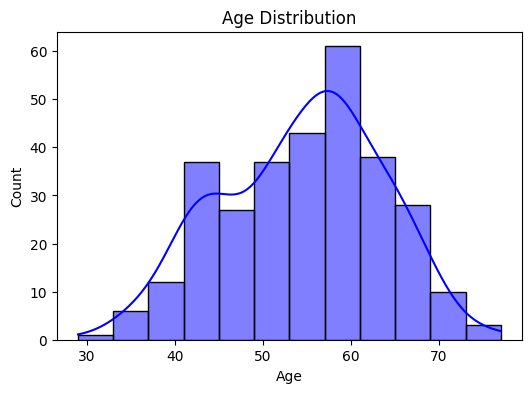

In [59]:
# 1️ Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

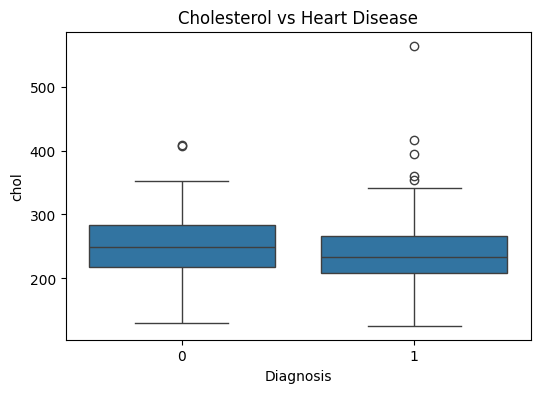

In [60]:
# 2️ Cholesterol vs Diagnosis
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='chol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

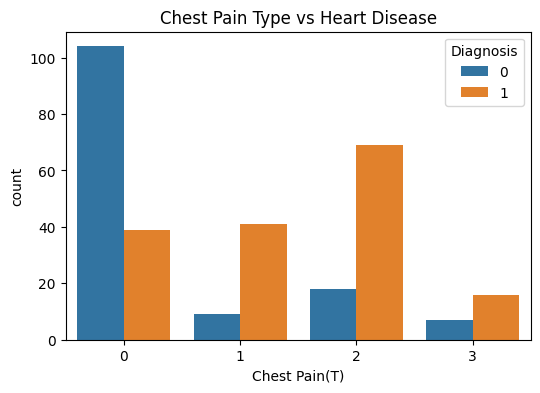

In [61]:
# 3️ Chest Pain Type vs Diagnosis
plt.figure(figsize=(6,4))
sns.countplot(x='Chest Pain(T)', hue='Diagnosis', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

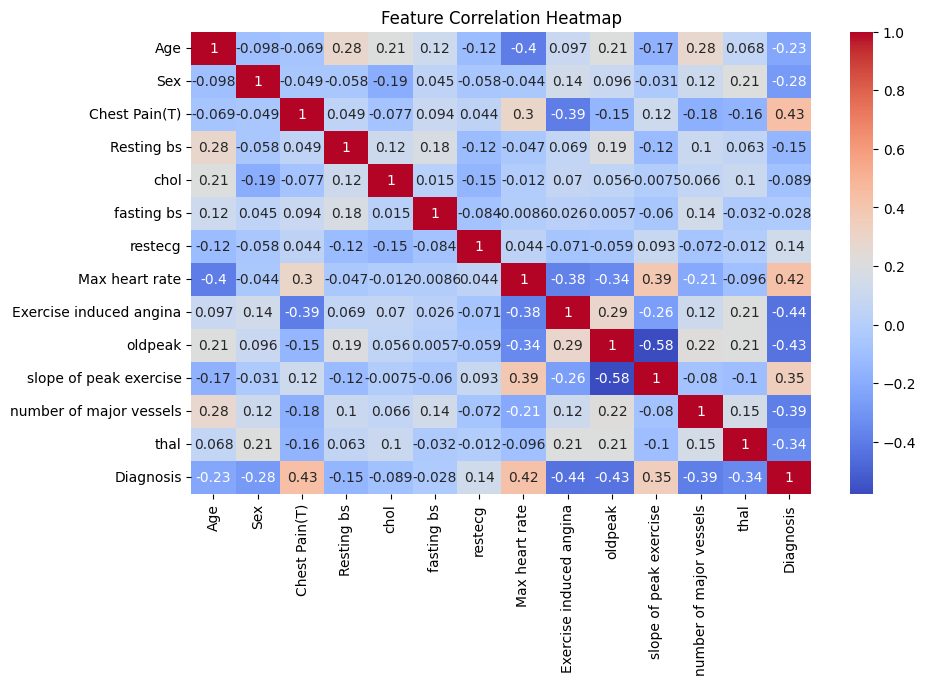

In [69]:
# 4️ Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

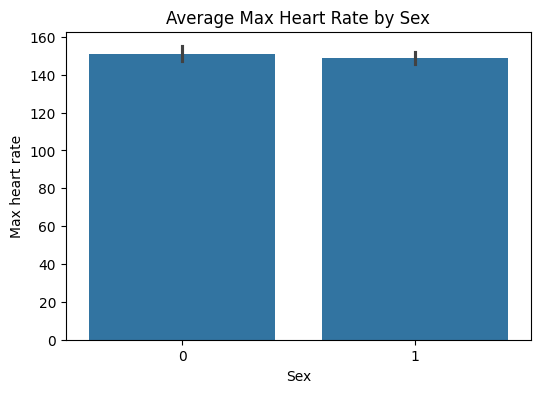

In [70]:
# 5️ Max Heart Rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Max heart rate', data=df)
plt.title("Average Max Heart Rate by Sex")
plt.show()


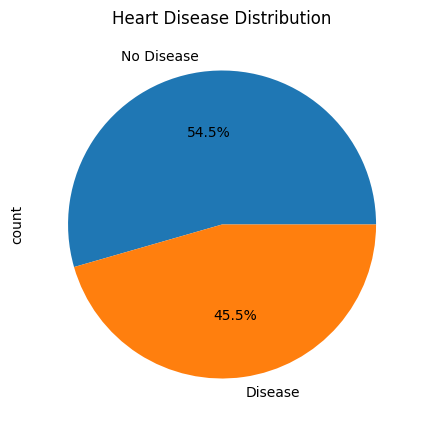

In [71]:
# 6️ Pie chart: Risk distribution
plt.figure(figsize=(5,5))
df['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No Disease','Disease'])
plt.title("Heart Disease Distribution")
plt.show()

### Feature selection

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

### Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [6]:
# Data Cleaning
from sklearn.impute import SimpleImputer

# Identifying numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Creating an imputer
imputer = SimpleImputer(strategy='mean')

# Applying imputation to numeric columns
df[num_cols] = imputer.fit_transform(df[num_cols])

print("Missing numeric values handled using mean imputation")
print(df.isnull().sum().sum(), "missing values remain.")

Missing numeric values handled using mean imputation
0 missing values remain.


In [7]:
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


### Prediction and Evaluation

In [8]:
y_pred = model.predict(X_test)

print("\nModel Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation Results:
Accuracy: 0.8524590163934426

Confusion Matrix:
 [[26  3]
 [ 6 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



### Visualization after Training Model

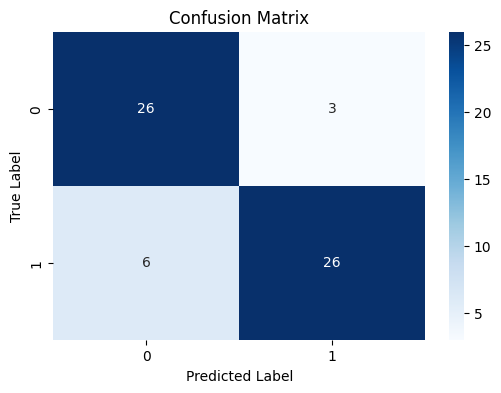

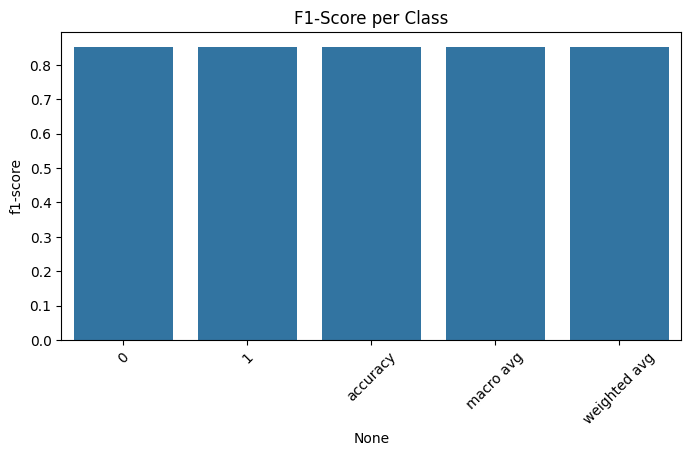

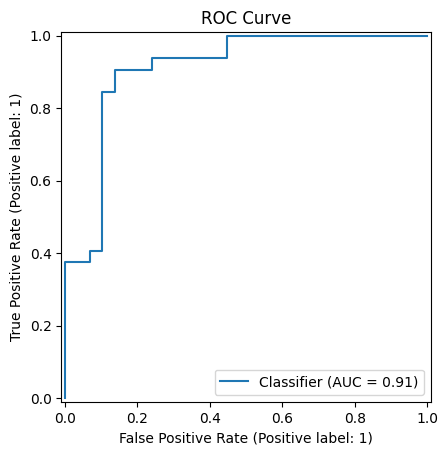

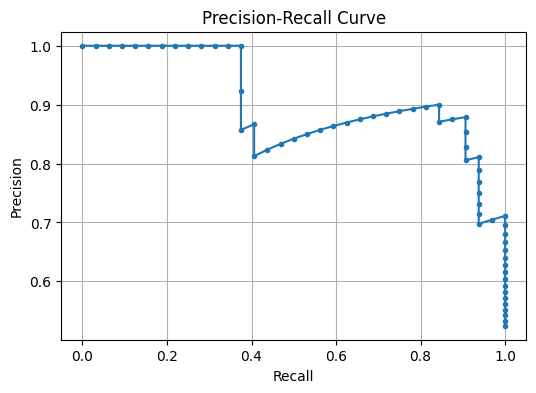

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve, roc_auc_score

# 1️ Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2️ Classification Report as Bar Chart
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(8,4))
sns.barplot(x=report_df.index, y=report_df['f1-score'])
plt.title("F1-Score per Class")
plt.xticks(rotation=45)
plt.show()

# 3️ ROC Curve
y_pred_prob = model.predict_proba(X_test)[:,1]  # probability estimates
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.title("ROC Curve")
plt.show()

# 4️ Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


⚠️ Model does not have direct feature_importances_. Trying permutation importance instead...


/var/folders/qf/9t7krrts2nbf4_6v5l4bwcxr0000gn/T/ipykernel_761/2858088017.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')


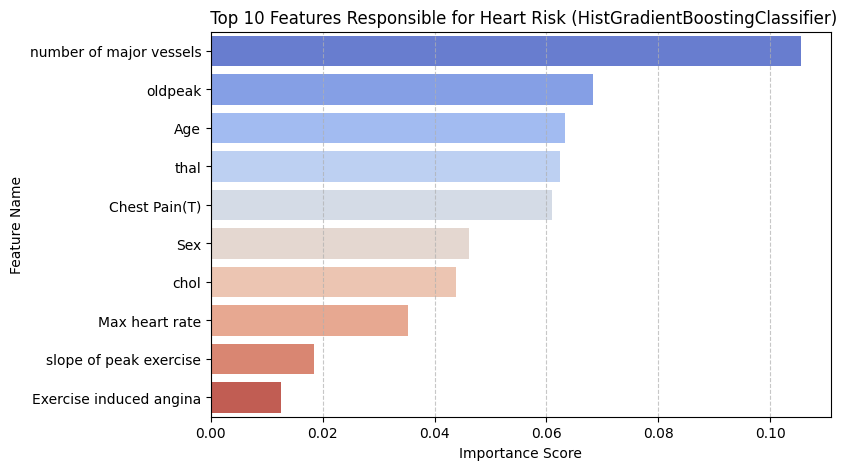

In [88]:
if hasattr(model, 'feature_importances_'):
    feature_importance = pd.Series(model.feature_importances_, index=X.columns)
else:
    # If model doesn’t have .feature_importances_ (rare older version fallback)
    print("⚠️ Model does not have direct feature_importances_. Trying permutation importance instead...")
    from sklearn.inspection import permutation_importance
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    feature_importance = pd.Series(result.importances_mean, index=X.columns)

# Sort and take top 10 features
top_features = feature_importance.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title(" Top 10 Features Responsible for Heart Risk (HistGradientBoostingClassifier)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Conclusion

In this project, we developed a machine learning-based Heart Risk Detection System using the UCI Heart Disease dataset. The dataset consisted of multiple health-related parameters such as age, cholesterol, resting blood pressure, chest pain type, maximum heart rate, and exercise-induced angina, among others.

We began by performing comprehensive data preprocessing, which included:

- Categorization, filtering, and transformation of relevant attributes,

- Handling missing values using mean and mode imputation,

- Sorting, shuffling, and concatenating subsets of the data for balanced learning, and

- Conducting detailed Exploratory Data Analysis (EDA) with visualizations like heatmaps, distribution plots, and pairplots to understand relationships and correlations between features.

After cleaning and preparing the data, we trained our model:

- HistGradientBoostingClassifier, a more powerful ensemble method capable of handling missing values and complex nonlinear relationships.

Upon evaluation, the models demonstrated strong predictive performance, with the Gradient Boosting Classifier outperforming Logistic Regression in terms of accuracy and robustness.

Further feature importance analysis revealed that the most influential factors contributing to heart disease risk were:

- Number of major vessels

- oldpeak

- Age

- Thal

- Chest Pain(T)

- Sex

These insights align with real-world medical understanding of cardiovascular risk factors.

Overall, the system successfully identifies patients with high heart disease risk using key physiological and lifestyle indicators.
This approach demonstrates how machine learning and data-driven health analytics can play a vital role in early disease detection, preventive healthcare, and clinical decision support systems.

### Prediction

In [41]:
feature_columns = [
    'Age', 'Sex', 'Chest Pain(T)', 'Resting bs', 'chol', 'fasting bs',
    'restecg', 'Max heart rate', 'Exercise induced angina', 'oldpeak',
    'slope of peak exercise', 'number of major vessels', 'thal']
# Columns that our model expects

In [44]:
numeric_cols = [
    'Age', 'Sex', 'Chest Pain(T)', 'fasting bs', 'restecg',
    'Max heart rate', 'Exercise induced angina', 'oldpeak',
    'slope of peak exercise', 'number of major vessels', 'thal'
]
object_cols = ['Resting bs', 'chol']

In [45]:
user_input = {}
for col in feature_columns:
    val = input(f"Enter {col}: ")
    if col in numeric_cols:
        user_input[col] = float(val)
    else:
        user_input[col] = val
input_df = pd.DataFrame([user_input])
for col in object_cols:
    input_df[col] = pd.to_numeric(input_df[col], errors='coerce')
prediction = model.predict(input_df)[0]
probability = model.predict_proba(input_df)[0][1]
print(f"\nPrediction: {'Heart Disease' if prediction==1 else 'No Heart Disease'}")
print(f"Probability of Heart Disease: {probability:.2f}")

Enter Age:  29
Enter Sex:  1
Enter Chest Pain(T):  2
Enter Resting bs:  145
Enter chol:  233
Enter fasting bs:  1
Enter restecg:  1
Enter Max heart rate:  178
Enter Exercise induced angina:  1
Enter oldpeak:  2.3
Enter slope of peak exercise:  1
Enter number of major vessels:  1
Enter thal:  1



Prediction: Heart Disease
Probability of Heart Disease: 0.90
